# <h1> Problem Statement: Stock Market Analysis and Prediction</h1> <br>

<h4>Explanation: Our aim is to create software that analyses previous stock data of certain companies, <br> with help of certain parameters that affect stock value. We are going to implement these values in data mining algorithms. <br>This will also help us to determine the values that particular stock will have in near future. <br>We will determine the Month’s High and Low with help of data mining algorithms.</h4>


##### In this project we are going to take a five years of stock data for our analysis and prediction

### Let’s briefly discuss this. Open is the price of the stock at the beginning of <br>the trading day (it need not be the closing price of the previous trading day), high is the highest price of the stock on that trading day, low the<br>lowest price of the stock on that trading day, and close the price of the stock at closing time. Volume indicates how many stocks were traded.<br> Adjusted close is the closing price of the stock that adjusts the price of the stock for corporate actions.<br> While stock prices are considered to be set mostly by traders, stock splits (when the company makes each extant stock worth two and halves the price)<br>[link text](https://) and dividends (payout of company profits per share) also affect the price of a stock and should be accounted for.

# Team Members:


1.   Abdoulaye Balde
2.   Princess Nomaswati
3.   Sabin Adhikari
4.   Kamin Precody




#Get the Data
we are getting the dat from yahoo finance. I got the data from yahoo Finance.

*Note: You'll need to install pandas-datareader for this to work! Pandas <br> datareader allows you to read stock information directly from the internet <br>(https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-access) Use these links for install guidance (pip install pandas-datareader).



#Section 1 - Basic Analysis of Stock Information
In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock. <br>

# Importing   Libraries for doing the project

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader import DataReader
from pandas_datareader import data
import datetime
import warnings
import cufflinks as cf
cf.go_offline()
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
%matplotlib inline

/home/balde/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


We are going to take the data from 2015 till now in this month for different companies such as 
1. Microsoft ----> MSFT
2. HDB      -----> HDFC Bank Limited
3. IBM     ------> IBM
4. Amazon  ------> AMZN


In [2]:
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2020,7,1)

In [3]:
comp_list = ['HDB','IBM','MSFT','AMZN']

# set up Start and End time for data grab
start = datetime.datetime(2015,1,1)
end = datetime.datetime.now()
#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in comp_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
#The globals() function returns a dictionary containing the variables defined in the global namespace. 

In [4]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,47.439999,46.450001,46.730000,46.450001,21552500.0,41.471783
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.748566
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.364658
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.757530
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.275364


We use head and tail to show the first 5 rows and last 5 rows of our dataset

In [5]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-31,205.100006,199.009995,204.399994,205.009995,51248000.0,205.009995
2020-08-03,217.639999,210.440002,211.520004,216.539993,78983000.0,216.539993
2020-08-04,214.770004,210.309998,214.169998,213.289993,49280100.0,213.289993
2020-08-05,215.000000,211.570007,214.899994,212.940002,28806400.0,212.940002
2020-08-06,216.369995,211.550003,212.339996,215.595001,25225072.0,215.595001


In [6]:
stocks = pd.DataFrame({"HDB": HDB["Adj Close"],
                      "MSFT": MSFT["Adj Close"],
                      "IBM": IBM["Adj Close"],
                       'AMZN':AMZN['Adj Close']})
stocks.head()

,HDB,MSFT,IBM,AMZN
Date,,,,
2014-12-31,24.601927,41.471783,126.256348,310.350006
2015-01-02,25.198191,41.748566,127.531136,308.519989
2015-01-05,24.941265,41.364658,125.524490,302.190002
2015-01-06,24.204418,40.757530,122.817429,295.290009
2015-01-07,25.047911,41.275364,122.014748,298.420013


In [7]:
plt.figure(figsize=(17,8))
fig = px.line(stocks,title = 'All stocks')
fig.show()

<Figure size 1224x576 with 0 Axes>

What’s wrong with this chart? <br> While absolute price is important (pricy stocks are difficult to purchase, which affects not only their volatility but your ability to trade that stock),<br> when trading, we are more concerned about the relative change of an asset rather than its absolute price. Amazon’s stocks are much more expensive than Microsoft’s or HDB’s or IBM's, and this difference makes  Microsoft’s,IBM, HBD stocks appear much less volatile than they truly are. <br>

One solution would be to use two different scales when plotting the data; one scale will be used by  Microsoft and Amazon stocks, and the other by IBM and soon.

In [8]:
#stocks.plot(secondary_y = [ "MSFT", "AMZN"], grid = True,figsize = (17,8), fontsize = 18)
fig = px.line(stocks,[ "MSFT", "AMZN"],title = 'All stocks')
fig.show()

A “better” solution, though, would be to plot the information we actually want: the stock’s returns. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply.

One transformation would be to consider the stock’s return since the beginning of the period of interest. In other words, we plot:



This will require transforming the data in the stocks object, which I do next.

<h1> To find the daily return of each stock price. </h1>
we are using lambda function to calculate it

Price = price0/price t

In [9]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,HDB,MSFT,IBM,AMZN
Date,,,,
2014-12-31,1.000000,1.000000,1.000000,1.000000
2015-01-02,1.024236,1.006674,1.010097,0.994103
2015-01-05,1.013793,0.997417,0.994203,0.973707
2015-01-06,0.983842,0.982777,0.972762,0.951474
2015-01-07,1.018128,0.995264,0.966405,0.961560


This plot is going to show the daily return change  over time. and we can see here that the amazon stock price is always very expensive as compare to other.

In [10]:
stock_return.iplot(title = "Daily Return ALL stocks")

**Let see the change of open, close, high,and low over time**

In [11]:
plt.figure()
MSFT[['Open','Close','High','Low']].iplot(legend=True,)
# df.Close.plot(legend=True,)
# df.High.plot(legend=True)
# df.Low.plot(legend=True)
# plt.show()

<Figure size 432x288 with 0 Axes>

What is the daily return for the year 2019?

### we can see from the above graph that the highest return was in January 2019 

In [12]:
MSFT.Low.iplot()

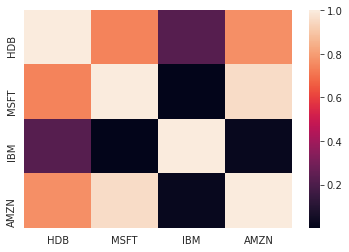

In [13]:
sns.heatmap(stocks.corr())

#### Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

In [14]:
# Describe is used to see the summary statistics about the dataset
MSFT.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,1410.00,1410.00,1410.00,1410.00,1.410000e+03,1410.00
mean,92.37,90.59,91.50,91.54,3.057172e+07,88.65
std,43.83,42.71,43.30,43.33,1.512899e+07,44.58
min,40.74,39.72,40.34,40.29,7.425600e+06,36.07
25%,55.11,54.04,54.58,54.67,2.124032e+07,50.29
50%,77.86,77.35,77.58,77.63,2.680555e+07,74.41
75%,116.98,114.88,115.40,115.84,3.475705e+07,113.76
max,217.64,211.57,216.33,216.54,1.691640e+08,216.54


In [15]:
MSFT.isnull().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [16]:
MSFT['Volume'].iplot(legend =True)

We can see that on Jun'2015 was the higher for Microsoft stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for Microsoft stock. Let's go ahead and caculate the moving average for the Microsoft stock.

For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

Simple Moving Average (SMA)—calculates the arithmetic mean of a security over a number (n) of time periods, A.
\begin{aligned} &SMA = \frac{A_1 + A_2 + \dotso + A_n}{n} \\ &\textbf{where:}\\ &A=\text{average in period }n\\ &n=\text{number of time periods}\\ \end{aligned} 
​	  
SMA= 
n
A 
1
​	 +A 
2
​	 +…+A 
n
​	 
​	 
where:
A=average in period n
n=number of time periods
​	

In [17]:
df_close = pd.DataFrame(MSFT['Close'])

In [18]:
df_close['MA_5']= df_close.Close.rolling(5).mean()
df_close['MA_10'] = df_close.Close.rolling(10).mean()
df_close['MA_20'] = df_close.Close.rolling(20).mean()
df_close['MA_30'] = df_close.Close.rolling(30).mean()
df_close['MA_50'] = df_close.Close.rolling(50).mean()
df_close['MA_100'] = df_close.Close.rolling(100).mean()

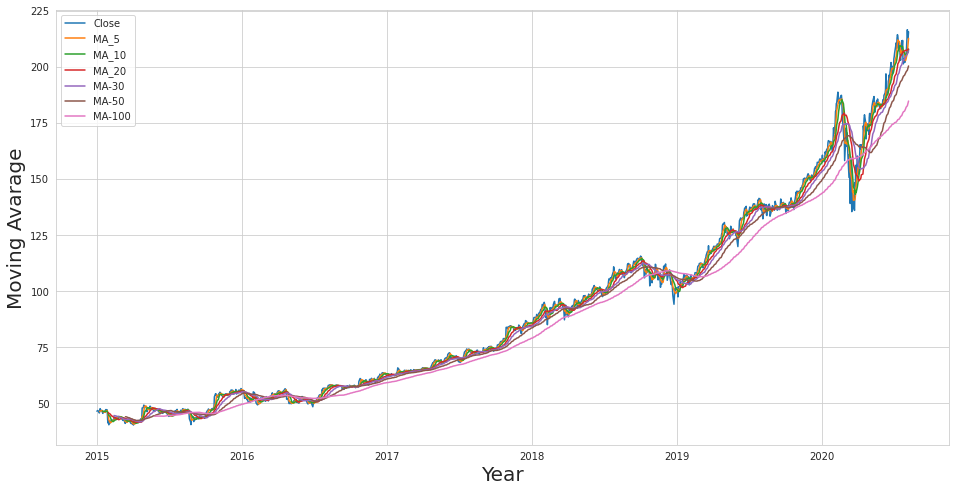

In [19]:
plt.figure(figsize=(16,8))
plt.plot(df_close['Close'],label='Close')
plt.plot(df_close['MA_5'], label='MA_5')
plt.plot(df_close['MA_10'], label='MA_10')
plt.plot(df_close['MA_20'], label='MA_20')
plt.plot(df_close['MA_30'], label = 'MA-30')
plt.plot(df_close['MA_50'], label = 'MA-50')
plt.plot(df_close['MA_100'], label = 'MA-100')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Moving Avarage', fontsize = 20)
plt.legend(loc=2)
plt.show()


In [20]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    MSFT[column_name] = df_close.Close.rolling(ma).mean()


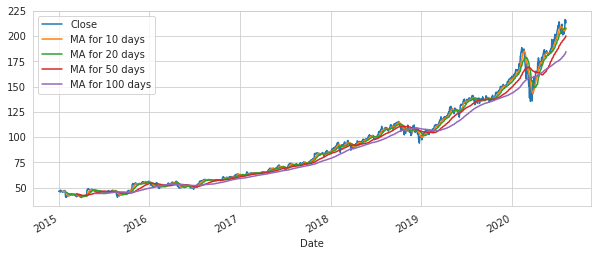

In [21]:
MSFT[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

In [22]:
MSFT['2019-01-01':'2019-12-31'].High.iplot()

This plot explain the increase of high in the year of 2019 and we can see from the trands that it was increasing exponentially at the end of the year due to two reasons:
1. Microsoft’s (ticker: MSFT) cloud traction is a big reason why its shares have significantly outperformed the market in 2019. The tech giant’s shares have risen 55% in 2019 amid investor enthusiasm over the company’s Azure cloud-computing business and its success in selling software subscriptions such as Office 365.

2. Cloud computing is one of the rare spending categories that can do well even in a lackluster economic environment. Companies are shifting huge sums of their technology spending to the cloud because it offers better reliability, an easier path to scaling up, and greater cost efficiencies versus traditional on-premises computing equipment.

This plot show the highest price of the year 2019 to 2020 and we can see that even though there is covid19 the price did not drop too much  it is high

In [23]:
MSFT['2020'].High.iplot()
HDB['2020'].High.iplot()
AMZN['2020'].High.iplot()
IBM['2020'].High.iplot()


# To slice the data frame for a specific month 

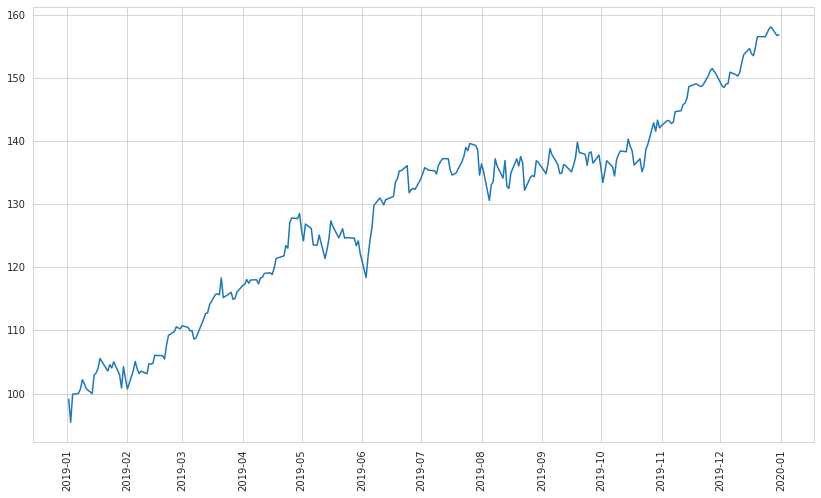

In [24]:
plt.figure(figsize=(14,8))
df_19 = MSFT.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-12-31')]
plt.plot(df_19.index, df_19['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation =90)
plt.show()

In [25]:
df_19.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

<h1> Daily return <h1>
This the daily return of microsoft and pnday provide us an easy wayto calculate it

In [26]:
MSFT['Daily Return'] = MSFT['Close'].pct_change()
MSFT['Daily Return']

Date
2014-12-31         NaN
2015-01-02    0.006674
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
                ...   
2020-07-31    0.005444
2020-08-03    0.056241
2020-08-04   -0.015009
2020-08-05   -0.001641
2020-08-06    0.012468
Name: Daily Return, Length: 1410, dtype: float64

In [27]:
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Close'].pct_change()

# Lets plot the daily return percentage
MSFT['Daily Return'].iplot(colors='red')
plt.show()

**We can see here even due to Covid 19 the daily return was high but it get drop also in the month of Febriray 2020 and still can't reach the pick yet and that is due to the lockdown **

<h2> Daily return for 2019 </h2>

In [28]:
MSFT['2019']['Daily Return'].iplot(colors = 'green')

In [29]:
MSFT['Daily Return'].iplot(kind ='hist', bins = 100)

### Daily return for the year 2020

In [30]:
MSFT['2020']['Daily Return'].iplot( colors ='gray')
plt.show()

#### We can see that the daily return for the year 202 is not moving away from the original axis 0 and also we notice that there are many loss in 2020-03  but it was a bit okay for the next month after that

<h2> Monthly return for the year 2020 </h2>

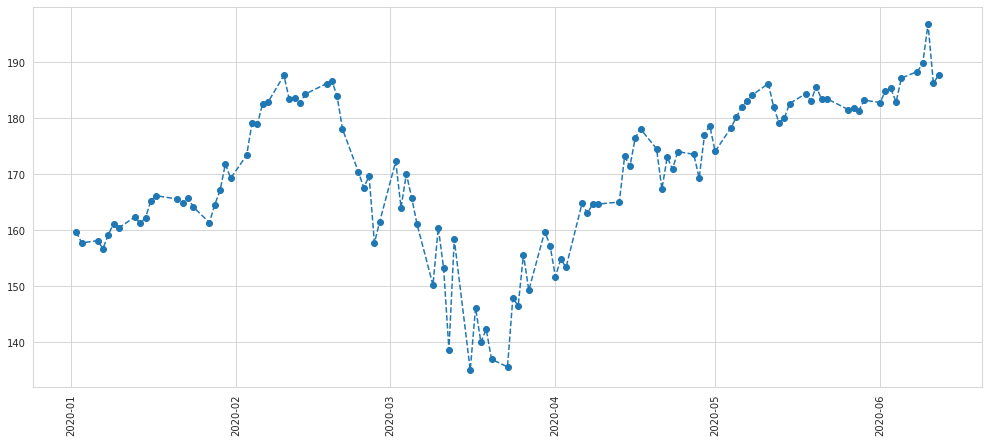

In [31]:
plt.figure(figsize=(17,7))
df_20 = MSFT.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-06-12')]
plt.plot(df_20.index, df_20['Adj Close'],linestyle = '--',marker = 'o')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation =90)
plt.show()

Now let's see a plot for the dail return the year 2020.





In [32]:
df_20['Daily Return'].iplot()

The above graph shows that the stock dropped down int this year here are some information about the lost
Microsoft loses $232 billion in market cap in 7 days – watch for this ‘buy zone,’ trader says
Stocks fell sharply in volatile trading Thursday as investors worried the coronavirus may be spreading in the U.S. A slew of corporate and analyst warnings on the virus dragged down the major averages, tipping them into correction territory
link: https://www.cnbc.com/2020/02/26/dow-futures-fall-after-microsoft-issues-coronavirus-warning.html

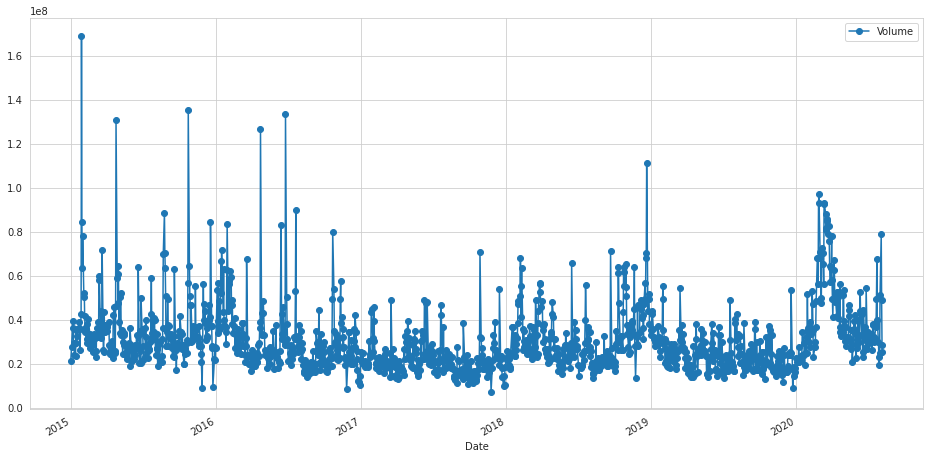

In [33]:
MSFT['Volume'].plot(legend=True, figsize=(16,8),marker='o')

#### checking for missing data because machine learning can work only with numberical data and no missing 
#### data has to be there.

In [34]:
MSFT.isnull().sum()

High                0
Low                 0
Open                0
Close               0
Volume              0
Adj Close           0
MA for 10 days      9
MA for 20 days     19
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

# FLOWCHART AND MACHINE LEARNING 


<h1> Machine Learning to predict the Adj Price <h1>
    
<h3> we are going to use Linear Regression because that algorithm provide us the flexibility to predict continuous variable. <br>
first we are going to use single linear regression and then we do multiple linear regression.<h3>

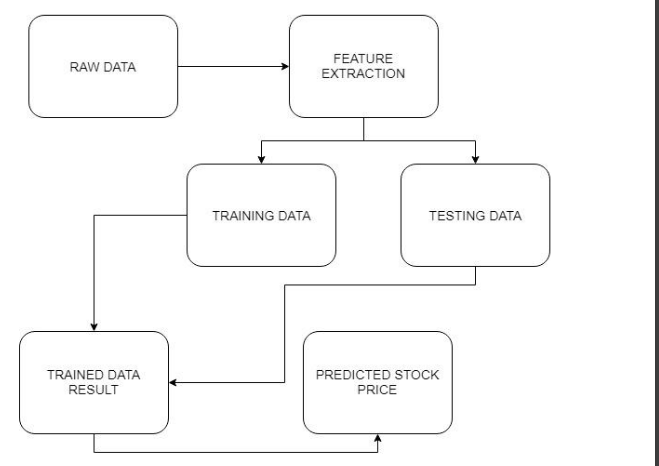

# 1 Linear Regression algorithm

### FEATURE SELECTION 

In [35]:
df = AMZN[['High','Low','Open','Close','Volume','Adj Close']]
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,312.980011,310.010010,311.549988,310.350006,2048000,310.350006
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013


In [36]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2020-07-31,3246.820068,3151.000000,3244.000000,3164.679932,8085500,3164.679932,NaN
2020-08-03,3184.000000,3104.000000,3180.510010,3111.889893,5074700,3111.889893,NaN
2020-08-04,3167.239990,3101.209961,3101.209961,3138.830078,4694300,3138.830078,NaN
2020-08-05,3213.590088,3127.300049,3143.770020,3205.030029,3916500,3205.030029,NaN
2020-08-06,3247.469971,3165.429932,3194.360107,3240.550049,3473846,3240.550049,NaN


In [37]:
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[3.12980011e+02 3.10010010e+02 3.11549988e+02 3.10350006e+02
  2.04800000e+06 3.10350006e+02]
 [3.14750000e+02 3.06959991e+02 3.12579987e+02 3.08519989e+02
  2.78320000e+06 3.08519989e+02]
 [3.08380005e+02 3.00850006e+02 3.07010010e+02 3.02190002e+02
  2.77420000e+06 3.02190002e+02]
 ...
 [2.71500000e+03 2.66900000e+03 2.68450000e+03 2.71382007e+03
  3.20880000e+06 2.71382007e+03]
 [2.78311011e+03 2.71804004e+03 2.72602002e+03 2.76440991e+03
  4.23170000e+06 2.76440991e+03]
 [2.79600000e+03 2.72100000e+03 2.78000000e+03 2.73439990e+03
  4.52660000e+06 2.73439990e+03]]


In [38]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 381.82998657  375.42999268  373.36999512 ... 3138.83007812 3205.0300293
 3240.55004883]



<h3>
Following are the steps we are following </h3>
1.   Importing packages from sklearn <br>
2.   Split the data into train and test sets <br>
3.   Train the model <br>
4.   Predict y_hat (y_pred) <br>
5.   Find th intercept and coefficient for the slop  <br>
6.   Plot the regression line. <br>
</br>


#### spliting the data into train and test sets we are train 80% of the data and test with  the 20% remainding

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred1 = reg.predict(X_test)

In [42]:
y_pred1[:20]

array([1549.95705406, 2519.92770072,  849.44450272, 1077.01641214,
        575.39831023,  526.28014913,  753.30578328,  800.08598402,
        878.81206124,  787.24006987,  544.90235168, 1552.71818319,
       1711.28050687,  413.33728518, 1701.30968132,  577.38461343,
        688.05534607,  780.58554465, 1869.80425749,  415.86656194])

In [43]:
# the intercept is :
print('Intercept')
reg.intercept_

Intercept


51.43582231671189

In [44]:
# the coefficient is 
print("Slop")
reg.coef_

Slop


array([ 2.57638815e+00, -1.60482280e+00, -1.12314071e+00,  5.74681854e-01,
       -1.00205258e-05,  5.74681854e-01])

In [45]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.9606947266027539

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 84.34697935855257
Mean Squared Error: 15998.228647069816
Root Mean Squared Error: 126.48410432568124


In [48]:
r2_score(y_test,y_pred1)

0.9606947266027539

### Finally our model give us a very good accuracy which is near to the perfect predict as we can see after calculation of the accuracy and root mean squared error

# 2 Support Vector Machine

In [49]:

import numpy as np 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [50]:
df = MSFT[['High','Low','Open','Close','Volume','Adj Close']]
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,47.439999,46.450001,46.730000,46.450001,21552500.0,41.471783
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.748566
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.364658
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.757530
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.275364


In [51]:
# Get the Adjusted Close Price 
df = df[['Adj Close']] 
# Take a look at the new data 
print(df.head())

            Adj Close
Date                 
2014-12-31  41.471783
2015-01-02  41.748566
2015-01-05  41.364658
2015-01-06  40.757530
2015-01-07  41.275364


In [52]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.tail()

,Adj Close,Prediction
Date,,
2020-07-31,205.009995,NaN
2020-08-03,216.539993,NaN
2020-08-04,213.289993,NaN
2020-08-05,212.940002,NaN
2020-08-06,215.595001,NaN


In [53]:
## Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 41.47178268]
 [ 41.74856567]
 [ 41.36465836]
 ...
 [200.57000732]
 [201.91000366]
 [197.83999634]]


In [54]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 39.16829681  39.1862793   39.14133072 ... 213.28999329 212.94000244
 215.59500122]


In [81]:
# Split the data into 80% training and 20% testing
print(X.reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 42)

[[ 41.47178268]
 [ 41.74856567]
 [ 41.36465836]
 ...
 [200.57000732]
 [201.91000366]
 [197.83999634]]


In [86]:
paramssvm = {'kernel':'rbf',
    'degree':2,
    'gamma':'scale',
    'coef0':0.0,
    'C':1.0,
    'max_iter':-1,}
svm = SVR(**paramssvm)
svm.fit(X_train,y_train)

SVR(degree=2)

In [87]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
accuracy2 = svm.score(x_test, y_test)
print("svm confidence: ", accuracy2)

svm confidence:  0.9373446463189985


In [88]:
from sklearn.ensemble import RandomForestRegressor

### Feature Scaling
Tt would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:


In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Training the Algorithm
Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following code:


In [66]:
# Split the data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestRegressor(n_estimators= 100, random_state=42,max_depth=5,min_samples_split=4)
clf.fit(X_train,y_train)


RandomForestRegressor(max_depth=5, min_samples_split=4, random_state=42)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs

In [67]:
y_pred = clf.predict(X_test)

####  Evaluating the Algorithm
The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error.

In [68]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.368056434504625
Mean Squared Error: 96.58227476143138
Root Mean Squared Error: 9.827628135080783


With 100 n_stimators we can see that the is less the the 10% so it is good for our model

In [69]:
print("The score of Random forest is ",r2_score(y_test,y_pred))

The score of Random forest is  0.9583081050785861


# 4.Gradient Boosting algorithm

In [71]:
X.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
model = GradientBoostingRegressor(**params)
model.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=4,
                          n_estimators=500)

In [73]:
score = model.score(X_train,y_train).round(3)
print("Training score of GradientBoosting is :",score)
print("the test score of GradienBoosting is :",model.score(X_test,y_test).round(3))

Training score of GradientBoosting is : 0.991
the test score of GradienBoosting is : 0.962


In [74]:
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 68.13
Test Variance score: 0.96


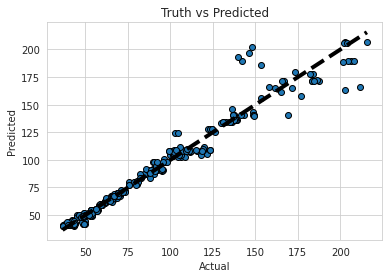

In [78]:
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Truth vs Predicted")
plt.show()